<a href="https://colab.research.google.com/github/bhagyashridumbre/r-descriptive-statistics/blob/main/PCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Loading data set.The following code will generate random data set of size(10 x 5). The data set can be loaded using pandas

In [ ]:
data = np.dot(np.random.randn(5,5), np.random.randn(5,10)).T
data = pd.DataFrame(data)
data.columns = ['var1','var2','var3','var4','var5']
print(data)

       var1      var2      var3      var4      var5
0  0.746534 -1.387129 -0.638470  2.304680  0.688374
1 -0.256095  1.274623 -1.397162 -3.197968 -3.470262
2 -1.545219 -0.565417  0.871702  0.402024 -0.810765
3  2.967610  3.521827  2.095922 -2.625043  4.164094
4  0.616124  0.034687 -1.530020  0.234852 -0.724707
5 -4.023619  3.551576  4.570334 -1.526068  0.579710
6  0.462708 -1.014156 -0.849687 -0.722461 -0.409626
7  7.232967  2.972118 -0.315687 -1.675600  3.779837
8  1.971600  2.481441  1.228561 -1.613608  0.450653
9  0.850078  3.405841  3.693359 -1.476634  1.045746


**Fitting and transforming the data set into desired number of dimensions by controlling the parameter n_components**
important functions corresponding to implementation of PCA are:
1.Fit : fits the data to the required number of PCs.

2.Transform : transform the data along PCs discovered.

In [ ]:
pca = PCA(n_components=4) # it will transform the existing data set into new dimensions called PCs
pca.fit(data)
data_new = pca.transform(data)
print(data_new.shape)

(10, 4)


**Examining PCs and the variance explained by them**
important functions corresponding to PCA in scikit learn are:
1.components_ : gives PCs for given data set.
2.explained_variance_ratio: Explains variance explained by each PC.

In [ ]:
print(pca.explained_variance_ratio_ *100) # It will explained by each PC
print("Printing the relation of PC'S and variables present in the data set")
print(".......................................................")

All_PCs = pd.DataFrame(pca.components_)
print(All_PCs)

All_PCs.columns = ['var1','var2','var3','var4','var5']
index1 = ['PC1','PC2','PC3','PC4']
All_PCs = pd.DataFrame(All_PCs)
All_PCs.index = index1

print(".....................................................")
print("The linear equations of principal components are:")
print("......................................................")
print('PC1' + '=' + str(np.round(All_PCs.iloc[0,0],2)) + '*' + 'var1' + '+' + str(np.round(All_PCs.iloc[0,1],2)) + '*' + 'var2' + '+' + str(np.round(All_PCs.iloc[0,2],2)) + '*' + 'var3' + '+' + str(np.round(All_PCs.iloc[0,3],2)) + '*' + 'var4' + '+' + str(np.round(All_PCs.iloc[0,4],2)) + '*' + 'var5')
print('PC2' + '=' + str(np.round(All_PCs.iloc[1,0],2)) + '*' + 'var1' + '+' + str(np.round(All_PCs.iloc[1,1],2)) + '*' + 'var2' + '+' + str(np.round(All_PCs.iloc[1,2],2)) + '*' + 'var3' + '+' + str(np.round(All_PCs.iloc[1,3],2)) + '*' + 'var4' + '+' + str(np.round(All_PCs.iloc[1,4],2)) + '*' + 'var5')
print('PC3' + '=' + str(np.round(All_PCs.iloc[2,0],2)) + '*' + 'var1' + '+' + str(np.round(All_PCs.iloc[2,1],2)) + '*' + 'var2' + '+' + str(np.round(All_PCs.iloc[2,2],2)) + '*' + 'var3' + '+' + str(np.round(All_PCs.iloc[2,3],2)) + '*' + 'var4' + '+' + str(np.round(All_PCs.iloc[2,4],2)) + '*' + 'var5')
print('PC4' + '=' + str(np.round(All_PCs.iloc[3,0],2)) + '*' + 'var1' + '+' + str(np.round(All_PCs.iloc[3,1],2)) + '*' + 'var2' + '+' + str(np.round(All_PCs.iloc[3,2],2)) + '*' + 'var3' + '+' + str(np.round(All_PCs.iloc[3,3],2)) + '*' + 'var4' + '+' + str(np.round(All_PCs.iloc[3,4],2)) + '*' + 'var5')

[49.42458782 35.29088826 13.02082134  1.58527061]
Printing the relation of PC'S and variables present in the data set
.......................................................
          0         1         2         3         4
0  0.736253  0.349308  0.080793 -0.175232  0.546518
1 -0.463994  0.490556  0.686209 -0.234476  0.134915
2  0.122217  0.318393 -0.277682 -0.707030 -0.553796
3 -0.392754 -0.289613 -0.356100 -0.526807  0.597943
.....................................................
The linear equations of principal components are:
......................................................
PC1=0.74*var1+0.35*var2+0.08*var3+-0.18*var4+0.55*var5
PC2=-0.46*var1+0.49*var2+0.69*var3+-0.23*var4+0.13*var5
PC3=0.12*var1+0.32*var2+-0.28*var3+-0.71*var4+-0.55*var5
PC4=-0.39*var1+-0.29*var2+-0.36*var3+-0.53*var4+0.6*var5


**Identifying the best number of principal component based on variance explained by them using scree plot.**

Text(0.5, 1.0, 'Scree plot')

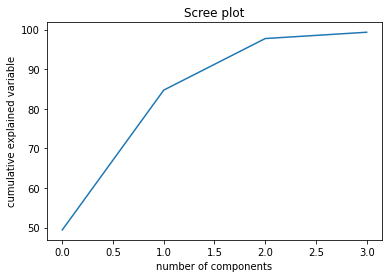

In [ ]:
Variance_Explained = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100) #Cumulative Variance
plt.plot(Variance_Explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variable')
plt.title('Scree plot')

**Plotting Biplot**
biplot is a visual representation that shows the contribution of different features on principal components.

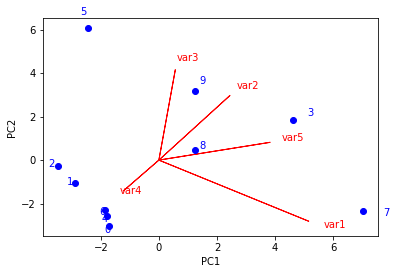

In [ ]:
PC1 = All_PCs.iloc[0]
PC2 = All_PCs.iloc[1]

xs = data_new[:,0]
ys = data_new[:,1]

for i in range(len(PC1)):
  plt.arrow(0,0,PC1[i]*max(xs), PC2[i]*max(ys),color ='r',width=0.0005, head_width=0.0025)
  plt.text(PC1[i]*max(xs)*1.1, PC2[i]*max(ys)*1.1, list(data.columns.values)[i], color='r')

for i in range(len(xs)):
  # circles project documents is (ie. rows from csv) as points onto PC axes
  plt.plot(xs[i], ys[i],'bo')
  plt.text(xs[i]*1.1, ys[i]*1.1, list(data.index)[i], color = 'b')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()